In [1]:
 # Import modules
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# data science
import pandas as pd
import numpy as np

# visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Neural networks
import tensorflow as tf

In [2]:
df = pd.read_csv("data/filtered_homicide_data.csv")
df.head()

,uid,reported_date,victim_race,victim_age,victim_sex,city,state,lat,lon,disposition,reported_year,age_range,LOCATION
0,Alb-000001,2010-05-04,Hispanic,78,Male,Albuquerque,NM,35.095788,-106.538555,No Arrest,2010,65+,"Albuquerque, NM"
1,Alb-000002,2010-02-16,Hispanic,17,Male,Albuquerque,NM,35.056810,-106.715321,Arrest Made,2010,0-17,"Albuquerque, NM"
2,Alb-000003,2010-06-01,White,15,Female,Albuquerque,NM,35.086092,-106.695568,No Arrest,2010,0-17,"Albuquerque, NM"
3,Alb-000004,2010-01-01,Hispanic,32,Male,Albuquerque,NM,35.078493,-106.556094,Arrest Made,2010,30-44,"Albuquerque, NM"
4,Alb-000005,2010-01-02,White,72,Female,Albuquerque,NM,35.130357,-106.580986,No Arrest,2010,65+,"Albuquerque, NM"


In [3]:
df.columns

Index(['uid', 'reported_date', 'victim_race', 'victim_age', 'victim_sex',
       'city', 'state', 'lat', 'lon', 'disposition', 'reported_year',
       'age_range', 'LOCATION'],
      dtype='object')

In [4]:
columns = ['victim_race', 'victim_age', 'victim_sex','disposition']
df = df.loc[:, columns]
df.head()

,LOCATION,disposition
0,"Albuquerque, NM",No Arrest
1,"Albuquerque, NM",Arrest Made
2,"Albuquerque, NM",No Arrest
3,"Albuquerque, NM",Arrest Made
4,"Albuquerque, NM",No Arrest


In [5]:
# fix the target
# Convert "disposition" column to binary
df['disposition'] = df['disposition'].map({'Arrest Made': 1, 'No Arrest': 0})

df.head()

,LOCATION,disposition
0,"Albuquerque, NM",0
1,"Albuquerque, NM",1
2,"Albuquerque, NM",0
3,"Albuquerque, NM",1
4,"Albuquerque, NM",0


In [6]:
cat_cols = df.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(df[col].nunique())
    print(df[col].value_counts())
    print()

47
Chicago, IL           5523
Philadelphia, PA      3036
Houston, TX           2908
Baltimore, MD         2827
Detroit, MI           2496
Los Angeles, CA       2196
St. Louis, MO         1661
Memphis, TN           1510
New Orleans, LA       1394
Indianapolis, IN      1321
Washington, DC        1308
Las Vegas, NV         1299
Jacksonville, FL      1151
Milwaukee, WI         1115
Columbus, OH          1070
Atlanta, GA            968
Oakland, CA            945
San Antonio, TX        825
Birmingham, AL         785
Nashville, TN          755
Cincinnati, OH         691
San Francisco, CA      663
Charlotte, NC          661
Oklahoma City, OK      653
Pittsburgh, PA         628
New York, NY           622
Boston, MA             605
Tulsa, OK              573
Louisville, KY         572
Fort Worth, TX         549
Buffalo, NY            510
Fresno, CA             480
Miami, FL              462
San Diego, CA          450
Stockton, CA           439
Baton Rouge, LA        423
Omaha, NE              40

In [7]:
# we can do Get Dummies on the entire dataset
df2 = pd.get_dummies(df)
df2.head()

,disposition,"LOCATION_Albuquerque, NM","LOCATION_Atlanta, GA","LOCATION_Baltimore, MD","LOCATION_Baton Rouge, LA","LOCATION_Birmingham, AL","LOCATION_Boston, MA","LOCATION_Buffalo, NY","LOCATION_Charlotte, NC","LOCATION_Chicago, IL",...,"LOCATION_San Antonio, TX","LOCATION_San Bernardino, CA","LOCATION_San Diego, CA","LOCATION_San Francisco, CA","LOCATION_Savannah, GA","LOCATION_St. Louis, MO","LOCATION_Stockton, CA","LOCATION_Tampa, FL","LOCATION_Tulsa, OK","LOCATION_Washington, DC"
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47478 entries, 0 to 47477
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   disposition                  47478 non-null  int64
 1   LOCATION_Albuquerque, NM     47478 non-null  uint8
 2   LOCATION_Atlanta, GA         47478 non-null  uint8
 3   LOCATION_Baltimore, MD       47478 non-null  uint8
 4   LOCATION_Baton Rouge, LA     47478 non-null  uint8
 5   LOCATION_Birmingham, AL      47478 non-null  uint8
 6   LOCATION_Boston, MA          47478 non-null  uint8
 7   LOCATION_Buffalo, NY         47478 non-null  uint8
 8   LOCATION_Charlotte, NC       47478 non-null  uint8
 9   LOCATION_Chicago, IL         47478 non-null  uint8
 10  LOCATION_Cincinnati, OH      47478 non-null  uint8
 11  LOCATION_Columbus, OH        47478 non-null  uint8
 12  LOCATION_Denver, CO          47478 non-null  uint8
 13  LOCATION_Detroit, MI         47478 non-null  u

In [9]:
df2.disposition.value_counts()

0    24258
1    23220
Name: disposition, dtype: int64

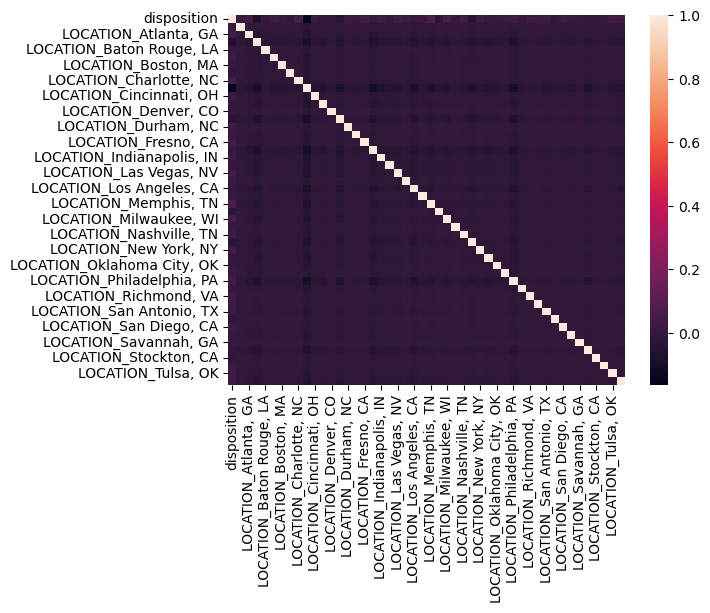

In [10]:
corrs = df2.corr()
sns.heatmap(corrs)
plt.show()

In [11]:
abs(corrs["disposition"]).sort_values(ascending=False)

disposition                    1.000000
LOCATION_Chicago, IL           0.162975
LOCATION_Memphis, TN           0.069274
LOCATION_Baltimore, MD         0.067767
LOCATION_Charlotte, NC         0.053843
LOCATION_Milwaukee, WI         0.046378
LOCATION_New Orleans, LA       0.046364
LOCATION_Las Vegas, NV         0.041765
LOCATION_Tulsa, OK             0.040040
LOCATION_Nashville, TN         0.038314
LOCATION_Atlanta, GA           0.036845
LOCATION_Detroit, MI           0.036573
LOCATION_Richmond, VA          0.034955
LOCATION_Fresno, CA            0.033378
LOCATION_Philadelphia, PA      0.033099
LOCATION_New York, NY          0.029200
LOCATION_Miami, FL             0.027449
LOCATION_San Diego, CA         0.025622
LOCATION_Sacramento, CA        0.025417
LOCATION_Albuquerque, NM       0.024100
LOCATION_Washington, DC        0.024017
LOCATION_Durham, NC            0.022179
LOCATION_San Antonio, TX       0.022094
LOCATION_Buffalo, NY           0.021837
LOCATION_Indianapolis, IN      0.020992


In [12]:
# Create our train/test set
X = df2.drop(columns=["disposition"])
y = df2["disposition"]

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(35608, 47) (35608,)
(11870, 47) (11870,)


In [13]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some pretty graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



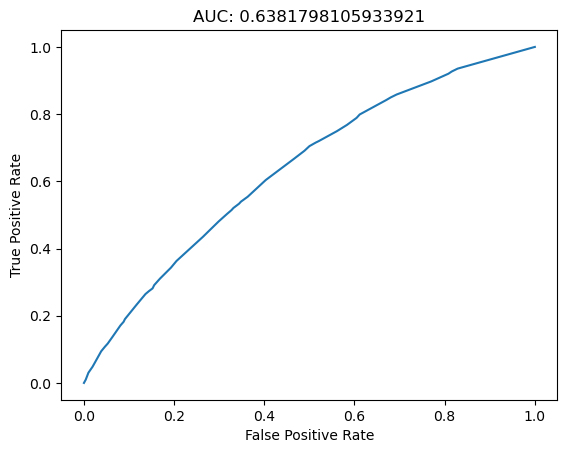

In [14]:
 # init the model
lr = LogisticRegression()
doMLClassification(lr, X_train, y_train, X_test, y_test)

In [15]:
# init the model
#knn = KNeighborsClassifier(n_neighbors=5)
#doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



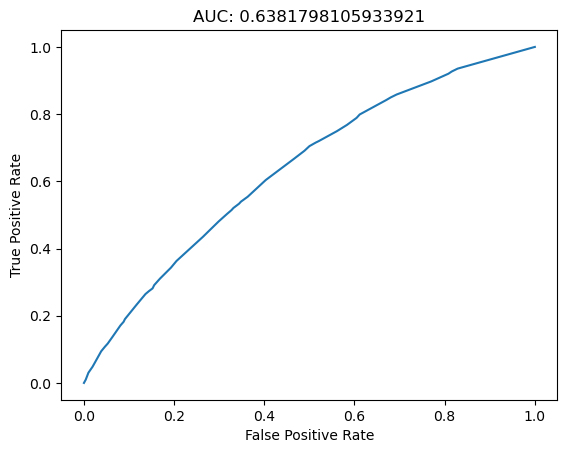

In [16]:
# init the model
dt = DecisionTreeClassifier(random_state=42)
doMLClassification(dt, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



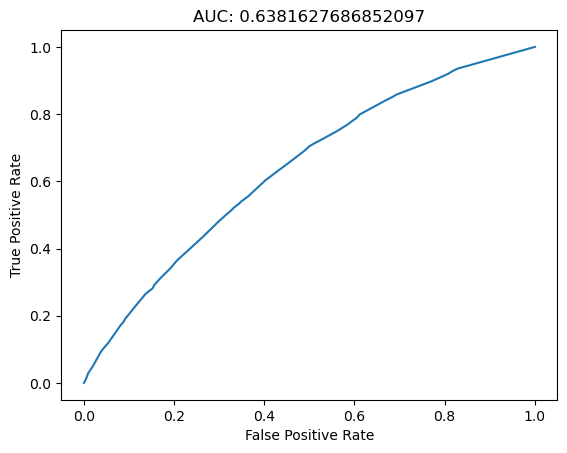

In [17]:
# init the model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



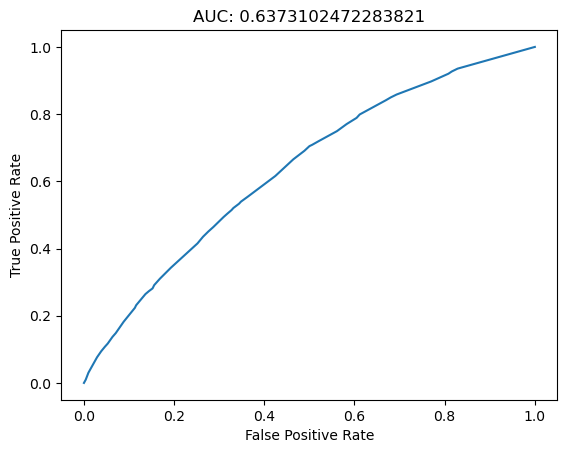

In [18]:
# init the model
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



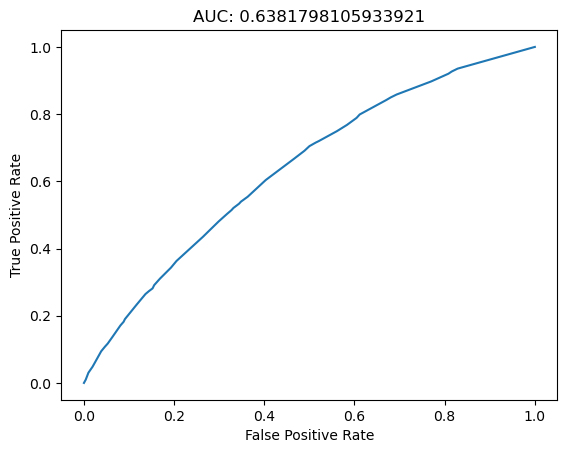

In [19]:
# init the model
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[ 8411  9782]
 [ 4755 12660]]
              precision    recall  f1-score   support

           0       0.64      0.46      0.54     18193
           1       0.56      0.73      0.64     17415

    accuracy                           0.59     35608
   macro avg       0.60      0.59      0.59     35608
weighted avg       0.60      0.59      0.58     35608


TESTING SET METRICS
[[2866 3199]
 [1569 4236]]
              precision    recall  f1-score   support

           0       0.65      0.47      0.55      6065
           1       0.57      0.73      0.64      5805

    accuracy                           0.60     11870
   macro avg       0.61      0.60      0.59     11870
weighted avg       0.61      0.60      0.59     11870



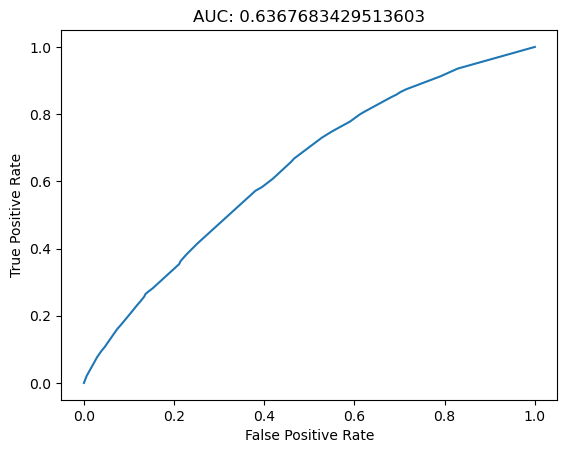

In [20]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[11811  6382]
 [ 7991  9424]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62     18193
           1       0.60      0.54      0.57     17415

    accuracy                           0.60     35608
   macro avg       0.60      0.60      0.59     35608
weighted avg       0.60      0.60      0.60     35608


TESTING SET METRICS
[[3953 2112]
 [2673 3132]]
              precision    recall  f1-score   support

           0       0.60      0.65      0.62      6065
           1       0.60      0.54      0.57      5805

    accuracy                           0.60     11870
   macro avg       0.60      0.60      0.59     11870
weighted avg       0.60      0.60      0.60     11870



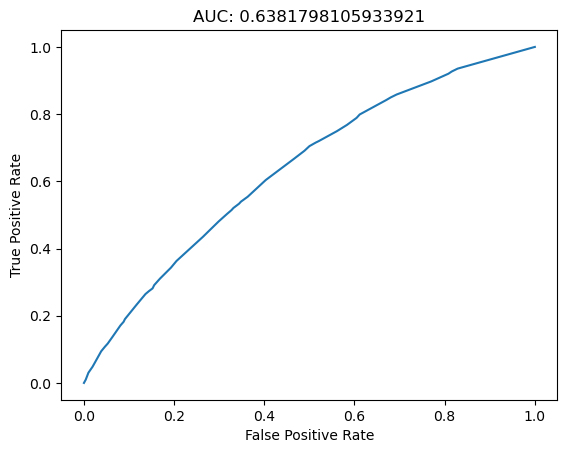

In [21]:
# init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

In [22]:
# init the model
lgb = LGBMClassifier(random_state=42)
doMLClassification(lgb, X_train, y_train, X_test, y_test)

LightGBMError: Do not support special JSON characters in feature name.